In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [4]:
df.shape

(2443651, 9)

In [5]:
df.isna().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Part 1: Analyzing Best-Seller Trends Across Product Categories

In [6]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
proportion_best_seller = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])
proportion_best_seller

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Length: 296, dtype: float64

In [8]:
from scipy.stats import chi2_contingency

# Chi-square test for 'isBestSeller' and 'category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [9]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

the value of 0.122 suggest a weak relation between category and isBestSeller

In [10]:
crosstab_result_top20=crosstab_result.head(20)
crosstab_result_top20

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
Agricultural Equipment & Supplies,8421,109
Alexa Built-In Devices,106,1
Art & Craft Supplies,253,5
Arts & Crafts,9319,230


<Axes: xlabel='category'>

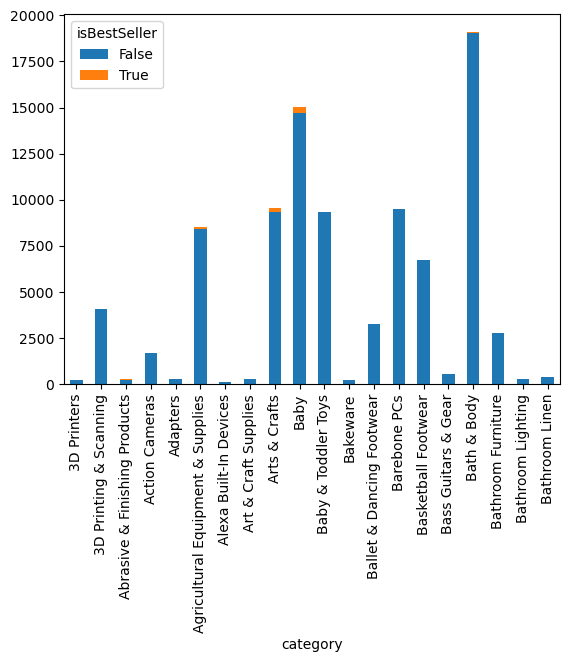

In [11]:
crosstab_result_top20.plot(kind="bar", stacked=True)

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [12]:
quantile1 = df['price'].quantile(0.25)
quantile3 = df['price'].quantile(0.75)
IQR = quantile3 - quantile1
IQR


36.0

#### Define the lower bound and upper bound for outlier removal

In [13]:
lower_bound = quantile1 - 1.5 * IQR
lower_bound

-44.01

In [14]:
upper_bound = quantile3 + 1.5 * IQR
upper_bound

99.99000000000001

##### Remove outliers from the dataset

In [15]:
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [16]:
top_20_categories=df_cleaned.category.value_counts().head(20)
top_20_categories

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

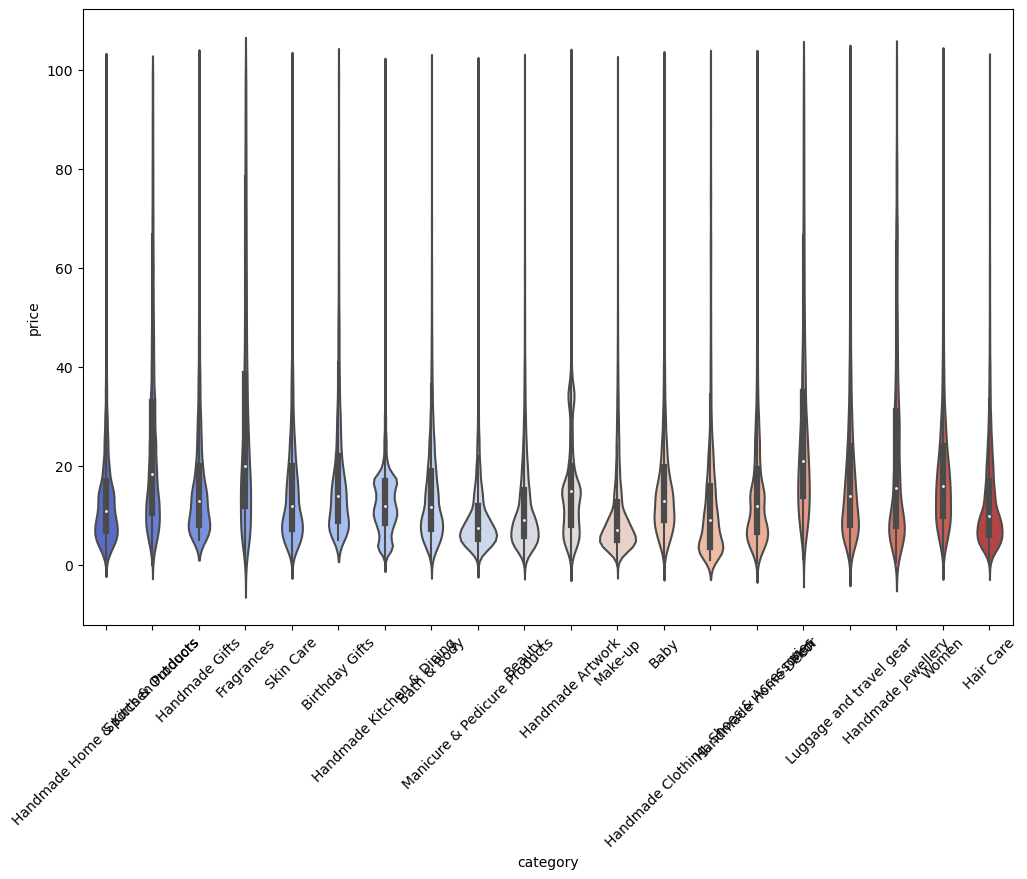

In [17]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_cleaned[df_cleaned['category'].isin(df_cleaned['category'].value_counts().index[:20])], x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45)

In [18]:
median_prices = df_cleaned.groupby('category')['price'].median()
median_prices

category
3D Printers                       52.195
3D Printing & Scanning            28.580
Abrasive & Finishing Products     10.150
Action Cameras                    33.135
Adapters                           7.050
                                   ...  
Wind Instruments                  13.470
Window Treatments                 17.990
Women                             15.990
Women's Sports & Outdoor Shoes    45.990
eBook Readers & Accessories       21.990
Name: price, Length: 296, dtype: float64

Find the category with the highest median price

In [19]:
highest_median_price = median_prices.max()
highest_median_price

74.0

In [20]:
highest_median_category = median_prices.idxmax()
highest_median_category

'Desktop PCs'

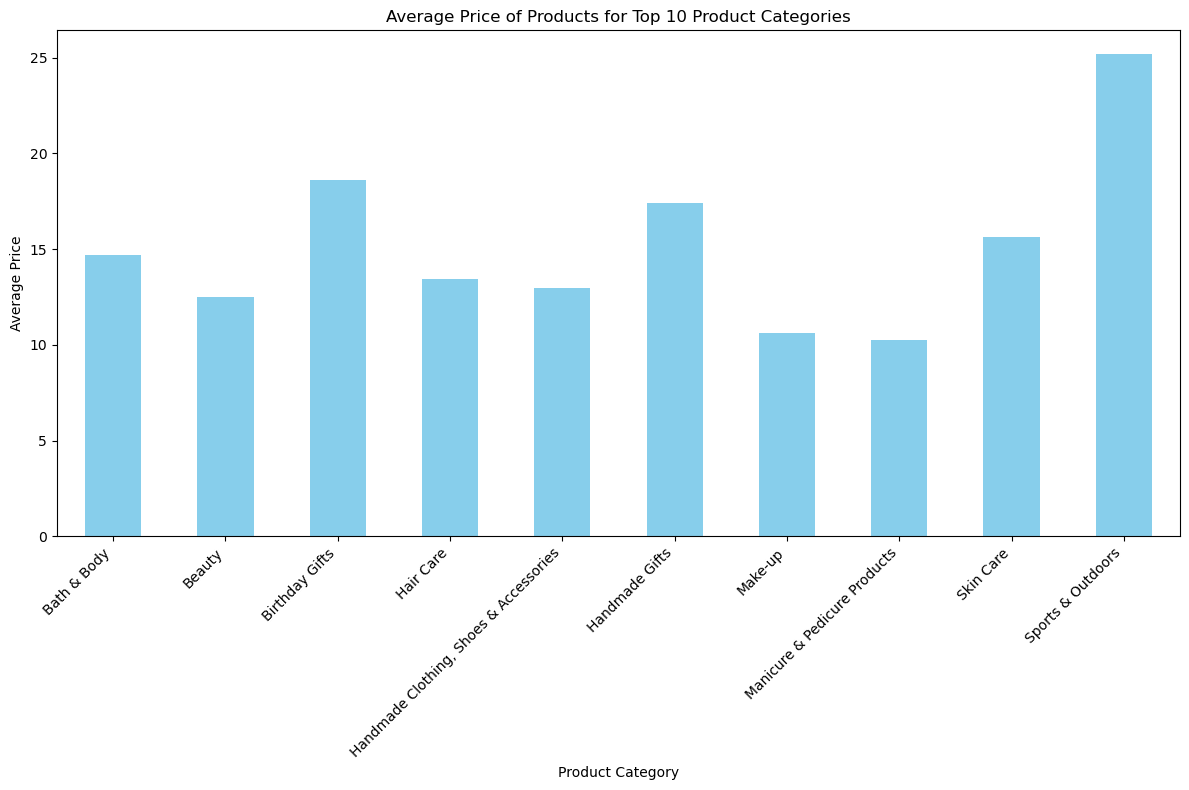

In [21]:
average_prices = df_cleaned.groupby('category')['price'].mean()

top_10_categories = df_cleaned['category'].value_counts().head(10).index

df_top_10 = df_cleaned[df_cleaned['category'].isin(top_10_categories)]

average_prices_top_10 = df_top_10.groupby('category')['price'].mean()


plt.figure(figsize=(12, 8))
average_prices_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
#product category tends to have the highest median price (NO FILTER by top categories):

average_prices = df.groupby('category')['price'].mean()

highest_avg_price_category = average_prices.idxmax()
highest_avg_price_category

'Laptops'

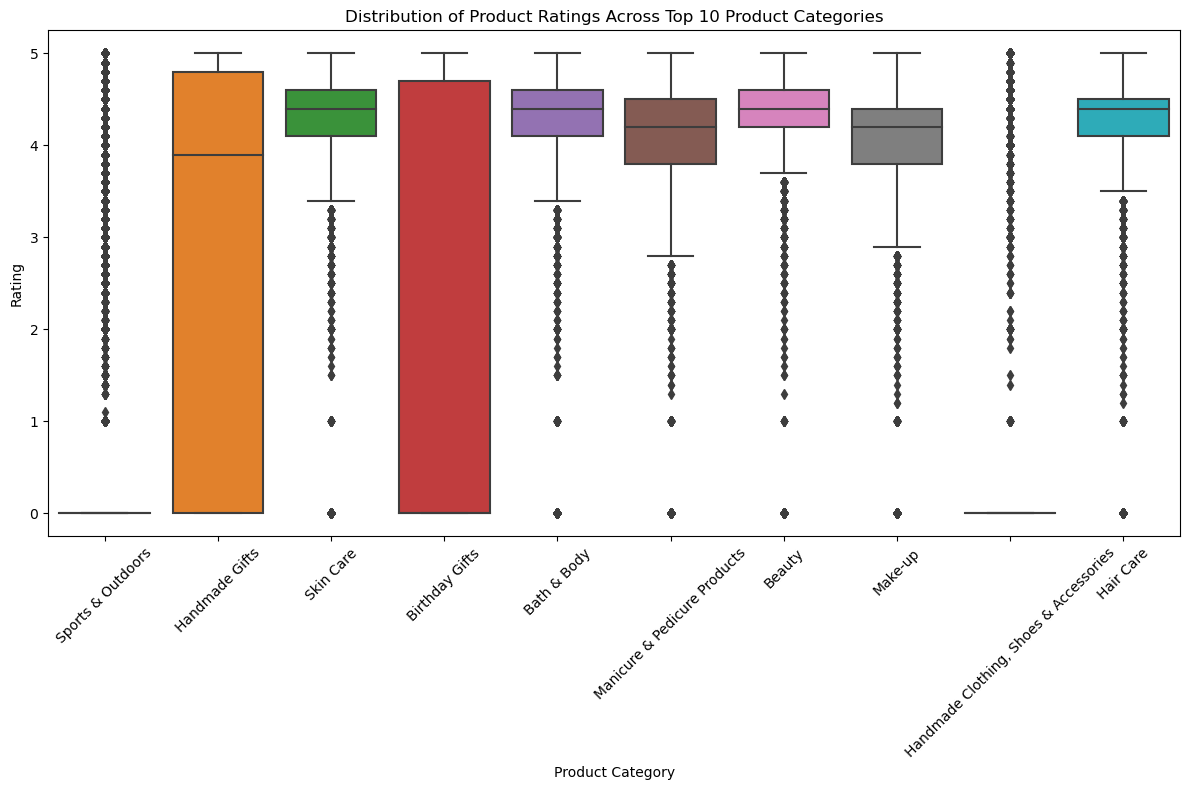

In [26]:
category_counts = df_cleaned['category'].value_counts()

top_10_categories = category_counts.head(10).index

df_top_10 = df_cleaned[df_cleaned['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='category', y='stars')
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
#category tends to receive the highest median rating from customers(NO FILTER BY CATEGORIES):
average_rating = df.groupby('category')['stars'].mean()

highest_avg_rating_category = average_rating.idxmax()
highest_avg_rating_category

'Luxury Food & Drink'

# Part 3: Investigating the Interplay Between Product Prices and Ratings

In [29]:
#correlation between stars and price :
correlation_coefficient = df_cleaned['price'].corr(df_cleaned['stars'])
correlation_coefficient

-0.07767299878181352

 correlation coefficient of -0.07 indicates a weak negative correlation between the price and the rating (stars) of products.

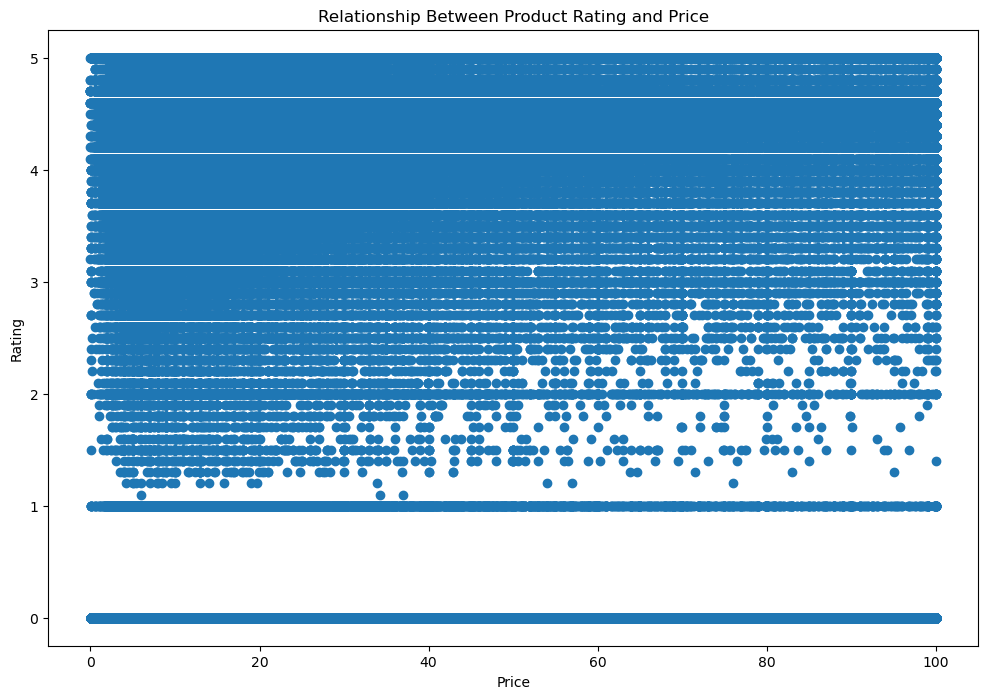

In [35]:
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned['price'], df_cleaned['stars'])
plt.title('Relationship Between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

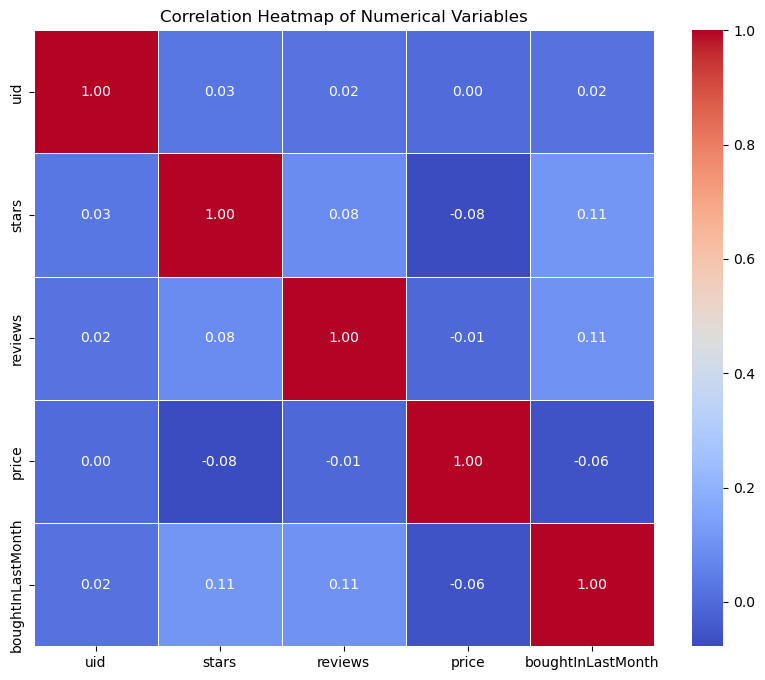

In [37]:
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

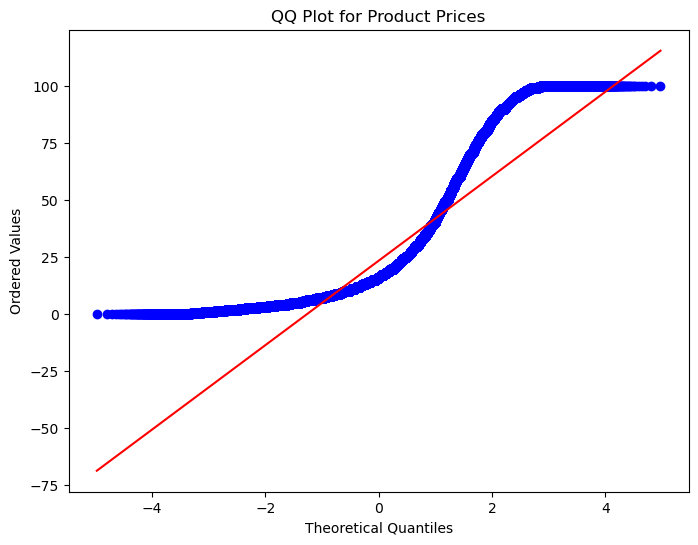

In [38]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df_cleaned['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()